In [10]:
import pandas as pd
data = pd.read_csv('C:/Users/ABHISHEK/Desktop/Indicators.csv', sep=',')
print(type(indicators))

<class 'list'>


In [11]:
data.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,36.0
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,90.0
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,242.0
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.3
5656457,Zimbabwe,ZWE,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,32.8


In [12]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [4]:
data.shape

(5656458, 6)

In [13]:
unique_country_names = data['CountryName'].unique()
#unique_country_names

In [6]:
len(unique_country_names)

247

# Step 1: Initial exploration of the data

In [7]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [14]:
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

# How many years of data do we have?


In [15]:
years = data['Year'].unique().tolist()
len(years)

56

# Whats the range of years?

In [16]:
print(str(min(years))+" to "+str(max(years)))

1960 to 2015


In [17]:
# select CO2 emissions for the United States
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'ARB'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emmissions
stage = data[mask1 & mask2]

In [18]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


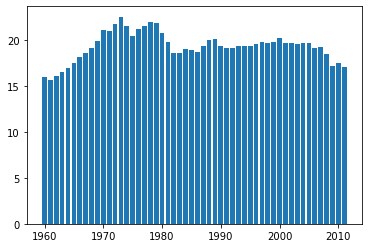

In [19]:
# get the years
years = stage['Year'].values
# get the values
co2 = stage['Value'].values

#create
plt.bar(years,co2)
plt.show()

In [29]:
# select CO2 emissions for India
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'IND'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emmissions
stage = data[mask1 & mask2]

In [30]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11577,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.268161
36513,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.284292
64049,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.306519
92493,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.322533
121290,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.308900


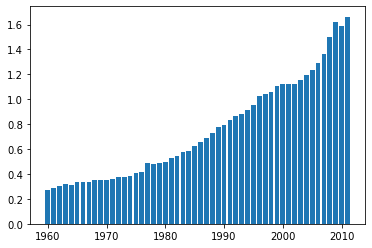

In [31]:
# get the years
years = stage['Year'].values
# get the values
co2 = stage['Value'].values

#create
plt.bar(years,co2)
plt.show()

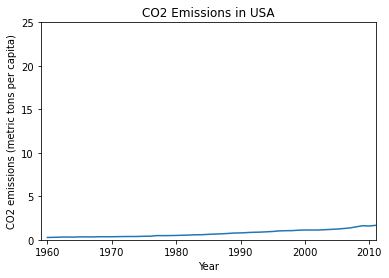

In [32]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

# Label the figure
plt.title('CO2 Emissions in USA')

# to make more honest, start they y axis at 0
plt.axis([1959,2011,0,25])

plt.show()

In [33]:
hist_data = stage['Value'].values

In [34]:
print(len(hist_data))

52


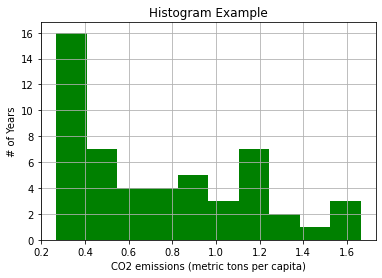

In [35]:
# the histogram ofthe data
plt.hist(hist_data, 10, density=False, facecolor='green')
# density = false means our width of bar will be same
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)

plt.show()

In [36]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])

#apply our mask
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


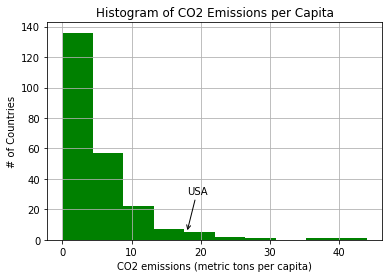

In [37]:
# 
fig, ax = plt.subplots()

ax.annotate("USA",
           xy=(18, 5), xycoords='data',
           xytext=(18, 30), textcoords='data',
           arrowprops=dict(arrowstyle="->",
                          connectionstyle="arc3"),
           )

plt.hist(co2_2011['Value'], 10, density=False, facecolor='green')
#density: width of your bins false will have all same size of bins.
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions per Capita')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

In [38]:
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

#apply our mask
gdp_stage = data[mask1 & mask2]

In [42]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11616,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,228.304470
36555,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,232.142053


In [40]:
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'IND'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

#apply our mask
gdp_stage = data[mask1 & mask2]

In [43]:
gdp_stage.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11616,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,228.304470
36555,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,232.142053
64095,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,234.166685


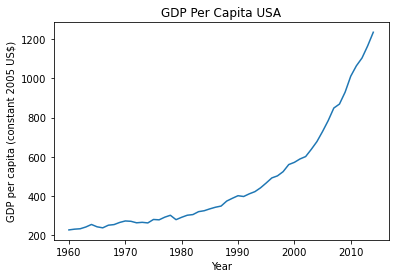

In [44]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

# Label the figure
plt.title('GDP Per Capita USA')

# to make more honest, start they y axis at 0
#plt.axis([1959,2011,0,25])
plt.show()


In [45]:

print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(), stage['Year'].max())

GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 2011


We have 3 extra years of GDP data, so let's trim those off so the sctterplot has equal length arrays to compare (this is actually required by scatterplot)

In [46]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


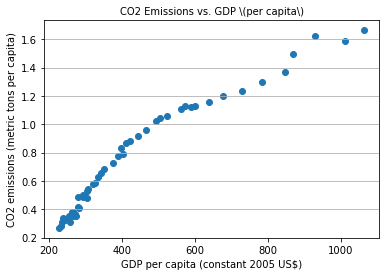

In [47]:
fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value'] # gdp usa
Y = stage['Value']  #co2 usa

axis.scatter(X, Y)
plt.show()

In [48]:
class student():
    def __init__(self, rollno, attendence, ds):
        self.rollno = rollno
        self.attendence = attendence
        self.ds = ds

In [49]:
komal = student(1, 4, "Yes")
sonam = student(2, 6, "Yes")
prasad = student(3, 8, "Yes")

In [50]:
komal.attendence

4

In [51]:
sonam.ds

'Yes'

In [52]:
prasad.attendence

8

In [54]:
sonam.attendence

6

In [55]:
dir (student)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']